# Assignment 1: Train and test your model on CIFAR20 dataset
Now that you have developed and tested your model on the toy dataset set. It's time to get down and get dirty with a standard dataset such as cifar20. At this point, you will be using the provided training data to tune the hyper-parameters of your network such that it works with cifar20 for the task of multi-class classification.

Important: Recall that now we have non-linear decision boundaries, thus we do not need to do one vs all classification. We learn a single non-linear decision boundary instead. Our non-linear boundaries (thanks to relu non-linearity) will take care of differentiating between all the classes

In [2]:
# Prepare Packages
import numpy as np
import matplotlib.pyplot as plt

from utils.data_processing import get_cifar20_data
from utils.evaluation import get_classification_accuracy


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Use a subset of CIFAR20 for the assignment
dataset = get_cifar20_data(
    subset_train = 8000,
    subset_val = 2000,
    subset_test = 2000,
)

print(dataset.keys())
print("Training Set Data  Shape: ", dataset['x_train'].shape)
print("Training Set Label Shape: ", dataset['y_train'].shape)
print("Validation Set Data  Shape: ", dataset['x_val'].shape)
print("Validation Set Label Shape: ", dataset['y_val'].shape)
print("Test Set Data  Shape: ", dataset['x_test'].shape)
print("Test Set Label Shape: ", dataset['y_test'].shape)

dict_keys(['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test'])
Training Set Data  Shape:  (8000, 3072)
Training Set Label Shape:  (8000,)
Validation Set Data  Shape:  (2000, 3072)
Validation Set Label Shape:  (2000,)
Test Set Data  Shape:  (2000, 3072)
Test Set Label Shape:  (2000,)


In [3]:
x_train = dataset['x_train']
y_train = dataset['y_train']
x_val = dataset['x_val']
y_val = dataset['y_val']
x_test = dataset['x_test']
y_test = dataset['y_test']

In [4]:
# Import more utilies and the layers you have implemented
from layers.sequential import Sequential
from layers.linear import Linear
from layers.relu import ReLU
from layers.softmax import Softmax
from layers.loss_func import CrossEntropyLoss
from utils.optimizer import SGD
from utils.dataset import DataLoader
from utils.trainer import Trainer

In [1]:
classes = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle',
           'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
           'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile',
           'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
           'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster',
           'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange',
           'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate',
           'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
           'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone',
           'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale',
           'willow_tree', 'wolf', 'woman', 'worm']

100


## Visualize some examples from the dataset.

In [5]:
# We show a few examples of training images from each class.
classes = ['apple', 'fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus' ,'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle']
samples_per_class = 7

def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes):
      idxs = np.flatnonzero(y_train == y)
      idxs = np.random.choice(idxs, samples_per_class, replace=False)
      for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(dataset[idx])
        plt.axis('off')
        if i == 0:
          plt.title(cls)
    plt.show()

# Visualize the first 10 classes
# visualize_data(x_train.reshape(8000, 3, 32, 32).transpose(0, 2, 3, 1), classes[0:10], samples_per_class)

## Initialize the model

In [6]:
input_size = 3072
hidden_size = 50 # Hidden layer size (Hyper-parameter)
num_classes = 20 # Output

# For a default setting we use the same model we used for the toy dataset.
# This tells you the power of a 2 layered Neural Network. Recall the Universal Approximation Theorem.
# A 2 layer neural network with non-linearities can approximate any function, given large enough hidden layer
def init_model():
    np.random.seed(0) # No need to fix the seed here
    l1 = Linear(input_size, hidden_size)
    l2 = Linear(hidden_size, num_classes)
    r1 = ReLU()
    softmax = Softmax()
    return Sequential([l1, r1, l2, softmax])

In [18]:
# Initialize the dataset with the dataloader class
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=0.1, weight_decay=0.1)
loss_func = CrossEntropyLoss()
epoch = 200 # (Hyper-parameter)
batch_size = 200 # (Reduce the batch size if your computer is unable to handle it)

In [19]:
#Initialize the trainer class by passing the above modules
trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=10)

In [20]:
# Call the trainer function we have already implemented for you. This trains the model for the given
# hyper-parameters. It follows the same procedure as in the last ipython notebook you used for the toy-dataset
train_error, validation_accuracy = trainer.train()

Epoch 0
Epoch Average Loss: 2.995561
Validate Acc: 0.038
Epoch 10
Epoch Average Loss: 2.827114
Validate Acc: 0.102
Epoch 20
Epoch Average Loss: 2.685121
Validate Acc: 0.183
Epoch 30
Epoch Average Loss: 2.643985
Validate Acc: 0.175
Epoch 40
Epoch Average Loss: 2.653347
Validate Acc: 0.179
Epoch 50
Epoch Average Loss: 2.641449
Validate Acc: 0.170
Epoch 60
Epoch Average Loss: 2.638679
Validate Acc: 0.210
Epoch 70
Epoch Average Loss: 2.637001
Validate Acc: 0.222
Epoch 80
Epoch Average Loss: 2.634001
Validate Acc: 0.153
Epoch 90
Epoch Average Loss: 2.628490
Validate Acc: 0.207
Epoch 100
Epoch Average Loss: 2.638195
Validate Acc: 0.230
Epoch 110
Epoch Average Loss: 2.630941
Validate Acc: 0.236
Epoch 120
Epoch Average Loss: 2.639778
Validate Acc: 0.212
Epoch 130
Epoch Average Loss: 2.639395
Validate Acc: 0.225
Epoch 140
Epoch Average Loss: 2.645378
Validate Acc: 0.211
Epoch 150
Epoch Average Loss: 2.633613
Validate Acc: 0.196
Epoch 160
Epoch Average Loss: 2.622255
Validate Acc: 0.163
Epoch 17

### Print the training and validation accuracies for the default hyper-parameters provided

In [21]:
from utils.evaluation import get_classification_accuracy
out_train = net.predict(x_train)
acc = get_classification_accuracy(out_train, y_train)
print("Training acc: ",acc)
out_val = net.predict(x_val)
acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",acc)

Training acc:  0.19
Validation acc:  0.198


### Debug the training
With the default parameters we provided above, you should get a validation accuracy of around ~0.2 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the training loss function and the validation accuracies during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

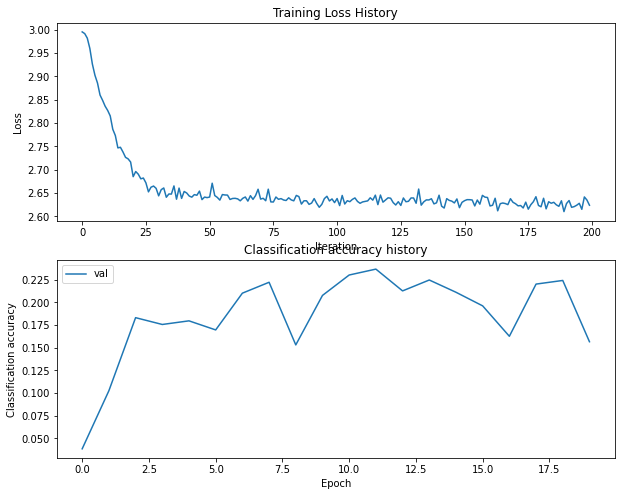

In [22]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

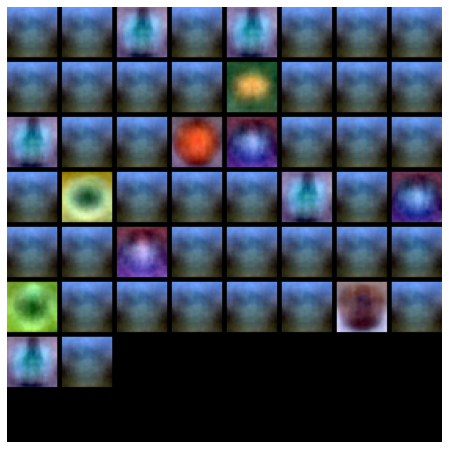

In [23]:
from utils.vis_utils import visualize_grid
# Credits: http://cs231n.stanford.edu/

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net._modules[0].parameters[0]
    W1 = W1.reshape(3, 32, 32, -1).transpose(3, 1, 2, 0)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters (50%)

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 40% on the validation set. Our best network gets over 40% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-20 as you can (40% could serve as a reference), with a fully-connected Neural Network.

In [8]:
import os
batch_size = 128 # (Reduce the batch size if your computer is unable to handle it)
best_param, best_acc = (50, 0.1, 0.1, 200), 0.190
(hidden_size, lr, weight_decay, epoch) = (200, 0.05, 0.01, 401)
dataset = DataLoader(x_train, y_train, x_val, y_val, x_test, y_test)
net = init_model()
optim = SGD(net, lr=lr, weight_decay=weight_decay)
loss_func = CrossEntropyLoss()
trainer = Trainer(dataset, optim, net, loss_func, epoch, batch_size, validate_interval=40,verbose=True)
# for plot
train_error, validation_accuracy = trainer.train()
# For inspection
out_train = net.predict(x_train)
train_acc = get_classification_accuracy(out_train, y_train)
print("parameters", (hidden_size, lr, weight_decay, epoch))
print("Training acc: ",train_acc)
out_val = net.predict(x_val)
val_acc = get_classification_accuracy(out_val, y_val)
print("Validation acc: ",val_acc)

with open('result','a+') as f:
    f.write(f"parameters: ({(hidden_size, lr, weight_decay, epoch)})\n")
    f.write(f"Training acc {train_acc}\n")
    f.write(f"Validation acc {val_acc}\n")
    if val_acc > best_acc:
        best_acc = val_acc
        best_param = (hidden_size, lr, weight_decay, epoch)
        f.write('------best above ----')
# del net
del dataset

Epoch 0
Epoch Average Loss: 2.994735
Validate Acc: 0.043
Epoch 40
Epoch Average Loss: 2.168946
Validate Acc: 0.338
Epoch 80
Epoch Average Loss: 1.975765
Validate Acc: 0.340
Epoch 120
Epoch Average Loss: 1.882926
Validate Acc: 0.305
Epoch 160
Epoch Average Loss: 1.793965
Validate Acc: 0.343
Epoch 200
Epoch Average Loss: 1.756038
Validate Acc: 0.354
Epoch 240
Epoch Average Loss: 1.729988
Validate Acc: 0.363
Epoch 280
Epoch Average Loss: 1.727206
Validate Acc: 0.311
Epoch 320
Epoch Average Loss: 1.691097
Validate Acc: 0.344
Epoch 360
Epoch Average Loss: 1.671820
Validate Acc: 0.365
Epoch 400
Epoch Average Loss: 1.650663
Validate Acc: 0.398
parameters (200, 0.05, 0.01, 401)
Training acc:  0.5185
Validation acc:  0.3975


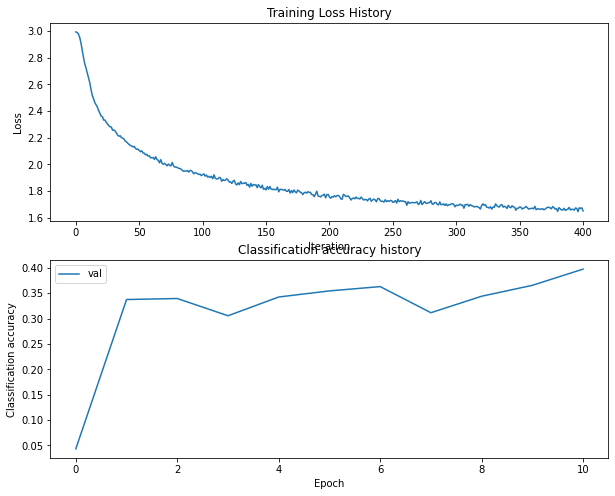

In [9]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

1) Intuitively, a weight decay of 0.1 is too high (especially when we do one update for a batch). So, I change it to 0.05 and then 0.01.


2) Although the hint says the LR is low, experiment with higher LR will corrupt the model. But lr=005 leads to slow convergence and underfit. So, I add exponential lr decay.


3) With a two layer network, we definitely need to expand the width. So I expand it to 100 then 200.


4) In parameter searching, all epoches are set to 200 for fast training. I did not see overfitting, so in final training I set epoch to 400.

In [ ]:
# store the best model into this
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model hyperparams in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# You are now free to test different combinations of hyperparameters to build   #
# various models and test them according to the above plots and visualization   #


# TODO: Show the above plots and visualizations for the default params (already #
# done) and the best hyper-params you obtain. You only need to show this for 2  #
# sets of hyper-params.                                                         #
# You just need to store values for the hyperparameters in best_net_hyperparams #
# as a list in the order
# best_net_hyperparams = [lr, weight_decay, epoch, hidden_size]
#################################################################################
best_net = [0.1, 0.01, 401, 200]



In [ ]:
# TODO: Plot the training_error and validation_accuracy of the best network (5%)

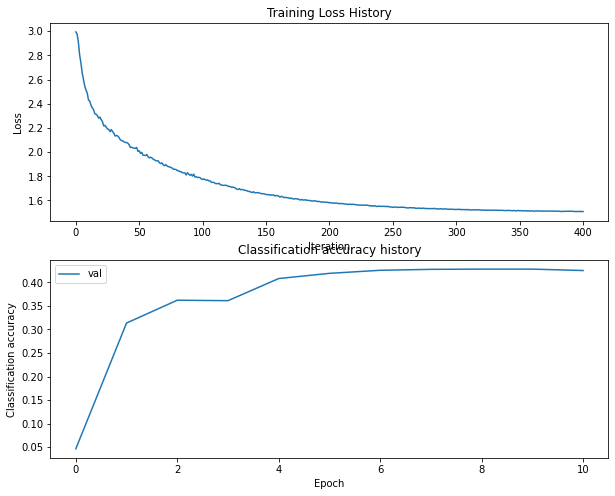

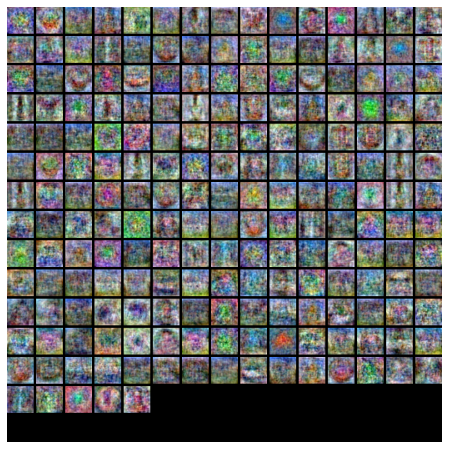

In [15]:
# Plot the training loss function and validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_error)
plt.title('Training Loss History')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
#plt.plot(stats['train_acc_history'], label='train')
plt.plot(validation_accuracy, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()
# TODO: visualize the weights of the best network (5%)
show_net_weights(net)

# Run on the test set (30%)
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [16]:
best_net = net
test_acc = (best_net.predict(x_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.4125


**Inline Question** (10%)

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$


1 and 3


Train on a larger dataset.
Increase the regularization strength.


$\color{blue}{\textit Your Explanation:}$

The model is over fitting. To reduce overfitting, one approach is adding more data, and another is add penalty to prevent model from over fitting the train data and increase generalization.
